***Tugas 2 II4035 Sistem Cerdas***
---

Nama	: Christina Wijaya

NIM	: 18221106

**Instruksi**

Diberikan data supermarket di link berikut (https://drive.google.com/file/d/1B04dU9P9T_QwXHdt6ScUwElz2ppLcgG7/view), lakukanlah Data Preparation terhadap dataset tersebut dan lakukanlah analisis Regresi untuk memprediksi penjualan berdasarkan fitur-fitur dari dataset yang diberikan sesuai yang telah diajarkan di perkuliahan.
 

Lengkapi source code dengan komentar yang menjelaskan isi source code.
 

Kemudian, jawablah pertanyaan berikut menggunakan dataset tersebut:
1. Ada beberapa nilai yang hilang di kolom PostalCode. Bagaimana Anda akan menentukan apakah baris-baris tersebut perlu dihapus atau ada cara lain untuk mengatasi nilai yang hilang ini?
2. Ubah format atribut OrderDate dan ShipDate dari string menjadi datetime. Jelaskan mengapa transformasi ini penting sebelum melakukan analisis lebih lanjut!
3. Buatlah kolom baru yang menyatakan nama hari ketika pesanan dibuat dari OrderDate dengan nama kolom OrderDateName. Bagaimana penambahan informasi ini dapat memberikan insight tambahan dalam analisis Anda?
4. Apakah hari pembelian (misalnya, weekdays vs weekends) berpengaruh signifikan terhadap total penjualan? (Hint: Gunakan atribut Order Day Name yang telah dibuat sebelumnya sebagai variabel independen untuk memodelkan pengaruhnya terhadap atribut Sales)
5. Bagaimana kategori produk mempengaruhi jumlah penjualan, dan kategori mana yang paling menguntungkan? (Hint: Gunakan atribut Category sebagai salah satu variabel independen untuk melihat pengaruhnya terhadap Sales. Analisis juga faktor-faktor lainnya yang mungkin berpengaruh)
6. Apakah terdapat perbedaan signifikan dalam jumlah penjualan berdasarkan mode pengiriman yang dipilih pelanggan? (Hint: Modelkan atribut Sales dengan menggunakan atribut Ship Mode sebagai variabel independen)
 
Submission di Edunex akan ditutup pada 23 April 2024 18.00 WIB. Kumpulkan file .ipynb yang telah dibuat dan submit dengan format “Tugas2_< NIM >_DPReg.ipynb” (zip apabila dibutuhkan dengan format yang sama)

***Data Preparation***
---

In [1]:
#Load Data
import pandas as pd
df = pd.read_csv("EDA-supermarket.csv")
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

**1. Nilai Hilang di Kolom PostalCode**

In [3]:
#Check for nulls
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

In [4]:
#Check for missing values not null but ?
for i in range(len(df.columns)):
    print("Attribute-", i, ':', df.columns[i], ', Number of ?:', df[df[df.columns[i]] == '?'].shape[0])

Attribute- 0 : Row ID , Number of ?: 0
Attribute- 1 : Order ID , Number of ?: 0
Attribute- 2 : Order Date , Number of ?: 0
Attribute- 3 : Ship Date , Number of ?: 0
Attribute- 4 : Ship Mode , Number of ?: 0
Attribute- 5 : Customer ID , Number of ?: 0
Attribute- 6 : Customer Name , Number of ?: 0
Attribute- 7 : Segment , Number of ?: 0
Attribute- 8 : Country , Number of ?: 0
Attribute- 9 : City , Number of ?: 0
Attribute- 10 : State , Number of ?: 0
Attribute- 11 : Postal Code , Number of ?: 0
Attribute- 12 : Region , Number of ?: 0
Attribute- 13 : Product ID , Number of ?: 0
Attribute- 14 : Category , Number of ?: 0
Attribute- 15 : Sub-Category , Number of ?: 0
Attribute- 16 : Product Name , Number of ?: 0
Attribute- 17 : Sales , Number of ?: 0


Nilai null hanya ditemukan pada kolom postal code

In [5]:
#Cek semua rows yang postalcodenya null
df[df.isnull().any(axis=1)]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Semuanya berasal dari Burlington, Vermont. Mari kita cek rows lain yang kotanya merupakan Burlington dan Statenya merupakan Vermont.

In [6]:
df[(df['City'] == 'Burlington') & (df['State'] == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


Ternyata, semua yang berasal dari Burlington, Vermont tidak memiliki postal code (NaN). Mari kita cari di Google saja untuk postal code Burlington, Vermont.

Menurut https://www.unitedstateszipcodes.org/05401/ , postal code atau ZIP code untuk kota Burlington, Vermont adalah 05401. Oleh karena itu, mari kita ganti saja nilai null yang ada di dataset tersebut menjadi 05401 karena semua postal code yang null merupakan order dari Burlington, Vermont.

In [7]:
df['Postal Code'].fillna("05401", inplace=True)

C:\Users\maizi\AppData\Local\Temp\ipykernel_14392\1476564420.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '05401' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['Postal Code'].fillna("05401", inplace=True)


Mari kita cek lagi value dari postal code pada order dari Burlington, Vermont. Setelahnya, kita juga akan mengecek jumlah null values untuk keseluruhan dataset.

In [8]:
df[(df['City'] == 'Burlington') & (df['State'] == 'Vermont')]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2234,2235,CA-2018-104066,05/12/2018,10/12/2018,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,05401,East,TEC-AC-10001013,Technology,Accessories,Logitech ClearChat Comfort/USB Headset H390,205.03
5274,5275,CA-2016-162887,07/11/2016,09/11/2016,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,05401,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
8798,8799,US-2017-150140,06/04/2017,10/04/2017,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,05401,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9146,9147,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,05401,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9147,9148,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,05401,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
9148,9149,US-2017-165505,23/01/2017,27/01/2017,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,05401,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9386,9387,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92
9387,9388,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9388,9389,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,9390,US-2018-127292,19/01/2018,23/01/2018,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,05401,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04


In [9]:
#Check for nulls
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64

In [12]:
#Cek Data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   object 
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

Selesai! Nilai hilang pada kolom Postal Code pun teratasi dengan baik :D

**2. Perubahan Format Atribut OrderDate dan ShipDate dari String Menjadi Datetime**

Teknik perubahan format ini biasa disebut dengan "Feature Tranformation". Mengapa ini penting? Hal ini penting untuk dilakukan karena pada saat analisis dan visualisasi data nanti, format tanggal yang sesuai diperlukan untuk dapat membuat grafik dan visualisasi lain yang sesuai dengan apa yang kita harapkan. Misalnya ketika kita hendak membuat line chart untuk penjualan dari waktu ke waktu. Jika kolom OrderDate masih string, sistem tidak akan mengetahui bahwa itu sebenarnya tanggal, sehingga line chart yang terbentuk sangat mungkin menjadi aneh, misalnya dengan adanya tanggal2 yang tidak berurutan satu sama lain. Dengan feature transformation menjadi format datetime yang benar, sistem juga akan memahami bahwa data tersebut merupakan tanggal sehingga dapat menyesuaikan visualisasi yang tepat untuk grafik yang hendak kita buat. Selain itu, feature transformation ini juga akan sangat berguna jika kita hendak mempartisi tanggal tersebut menjadi hari, bulan, ataupun tahun untuk analisis lebih dalam.

In [10]:
#Cek Data
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9800 non-null   object 
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [38]:
#Feature Transformation
import datetime as dt
df['Order Date'] = pd.to_datetime(df["Order Date"])
df['Ship Date'] = pd.to_datetime(df["Ship Date"])
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9800 non-null   int64         
 1   Order ID       9800 non-null   object        
 2   Order Date     9800 non-null   datetime64[ns]
 3   Ship Date      9800 non-null   datetime64[ns]
 4   Ship Mode      9800 non-null   object        
 5   Customer ID    9800 non-null   object        
 6   Customer Name  9800 non-null   object        
 7   Segment        9800 non-null   object        
 8   Country        9800 non-null   object        
 9   City           9800 non-null   object        
 10  State          9800 non-null   object        
 11  Postal Code    9800 non-null   object        
 12  Region         9800 non-null   object        
 13  Product ID     9800 non-null   object        
 14  Category       9800 non-null   object        
 15  Sub-Category   9800 n

Selesai! Kolom Order Date dan Ship Date sudah berubah tipe data menjadi datetime.

**3. Kolom Baru yang Menyatakan Nama Hari Ketika Pesanan Dibuat dari Order Date dengan Nama Kolom Order Date Name**

In [39]:
#Feature Transformation
df['Order Date Name'] = df['Order Date'].dt.day_name()
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Date Name
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Friday
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Friday
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Wednesday
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Thursday
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Sunday
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Thursday
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,Thursday
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Thursday


Selesai! Kolom Order Date Name yang berisi ekstraksi nama hari dari kolom Order Date telah berhasil ditambahkan.

Penambahan informasi ini dapat memberikan insight tambahan dalam analisis saya nantinya dengan memungkinkan saya mendapatkan insight berupa:
- Hari dengan pesanan yang paling banyak dibuat -> Dapat digunakan untuk keperluan marketing dan promosi
- Hari dengan pesanan yang paling sedikit dibuat -> Dapat digunakan untuk menghemat biaya pengiriman dengan mengurangi sumber daya di hari tersebut.
- Analisis pesanan pada setiap harinya di setiap wilayah -> Dapat digunakan untuk menyesuaikan strategi marketing dan promosi khusus di wilayah-wilayah tertentu.
- Analisis pesanan pada setiap harinya untuk setiap kategori ship mode -> Dapat digunakan untuk menghemat biaya shipping dengan menyesuaikan jumlah kategori moda pengiriman sesuai dengan data prediksi.

Dan masih banyak lagi.

***Regression***
---

**4. Pengaruh Hari Pembelian (misalnya weekdays vs weekends) terhadap total penjualan**

In [40]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np

In [42]:
#Direct Encoding untuk mengkategorikan weekday dan weekend
day_category = {"Order Date Name": {"Monday":"Weekday", "Tuesday":"Weekday", "Wednesday":"Weekday", "Thursday":"Weekday", "Friday":"Weekday", "Saturday":"Weekend", "Sunday":"Weekend"}}
df = df.replace(day_category)
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Date Name
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Weekday
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Weekday
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Weekday
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Weekday
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Weekday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Weekend
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Weekday
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,Weekday
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Weekday


In [48]:
#Ubah tipe data kolom Order Date Name menjadi Category
df["Order Date Name"] = df["Order Date Name"].astype("category")

In [49]:
#Label Encoding untuk merubah value Weekday dan Weekend menjadi biner
df["Order Date Name Binary"] = df["Order Date Name"].cat.codes
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Date Name,Order Date Name Binary
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Weekday,0
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Weekday,0
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Weekday,0
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Weekday,0
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Weekday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Weekend,1
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Weekday,0
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,Weekday,0
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Weekday,0


In [51]:
#Potong dataset menjadi hanya kolom Sales dan Order Date Name Binary
df1 = df[["Sales", "Order Date Name Binary"]]
df1

,Sales,Order Date Name Binary
0,261.9600,0
1,731.9400,0
2,14.6200,0
3,957.5775,0
4,22.3680,0
...,...,...
9795,3.7980,1
9796,10.3680,0
9797,235.1880,0
9798,26.3760,0


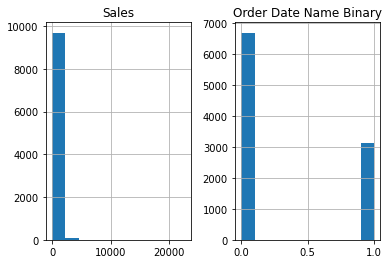

In [52]:
#Buat histogramnya
df1.hist()
plt.show()

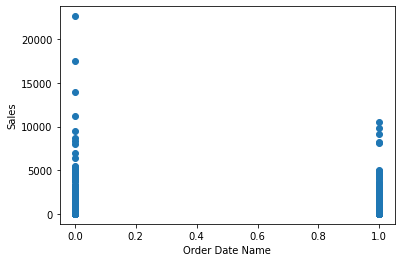

In [53]:
#Buat scatter plotnya
plt.scatter(df1["Order Date Name Binary"], df1["Sales"])
plt.xlabel("Order Date Name")
plt.ylabel("Sales")
plt.show()

In [58]:
#Pembuatan dataset pelatihan dan pengujian
msk = np.random.rand(len(df)) < 0.8
train = df1[msk]
test = df1[~msk]

In [59]:
#Buat model regresi sederhananya
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Order Date Name Binary']])
train_y = np.asanyarray(train[['Sales']])
regr.fit(train_x, train_y)
#The coefficients
print('Coefficients:', regr.coef_)
print('Intercept:', regr.intercept_)

Coefficients: [[1.75680787]]
Intercept: [233.90276209]


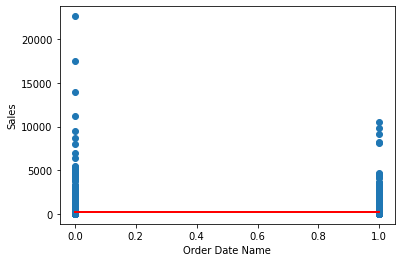

In [60]:
#Plot output model
plt.scatter(train["Order Date Name Binary"], train["Sales"])
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Order Date Name")
plt.ylabel("Sales")
plt.show()

In [62]:
#Evaluasi
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[["Order Date Name Binary"]])
test_y = np.asanyarray(test[["Sales"]])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_, test_y))

Mean absolute error: 257.29
Residual sum of squares (MSE): 222551.32
R2-score: -328848.24


Dapat dilihat pada visualisasi maupun pada hasil evaluasi bahwa korelasi antara hari pembelian (weekdays dan weekends) dengan total penjualan sangat minim, bahkan bisa dibilang tidak ada korelasinya. Mayoritas pesanan yang dibuat pada weekday maupun weekend memiliki nilai sales yang cenderung mirip.

**5. Pengaruh kategori produk terhadap jumlah penjualan**

In [63]:
#Ubah tipe data kolom Category menjadi category
df["Category"] = df["Category"].astype("category")

In [64]:
#Label Encoding untuk merubah value pada kolom category menjadi dalam bentuk angka
df["Category_cat"] = df["Category"].cat.codes
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Date Name,Order Date Name Binary,Category_cat
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Weekday,0,0
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Weekday,0,0
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Weekday,0,1
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Weekday,0,0
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Weekday,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Weekend,1,1
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Weekday,0,1
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,Weekday,0,2
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Weekday,0,2


In [65]:
#Potong dataset menjadi hanya kolom Sales dan Category_cat
df2 = df[["Sales", "Category_cat"]]
df2

,Sales,Category_cat
0,261.9600,0
1,731.9400,0
2,14.6200,1
3,957.5775,0
4,22.3680,1
...,...,...
9795,3.7980,1
9796,10.3680,1
9797,235.1880,2
9798,26.3760,2


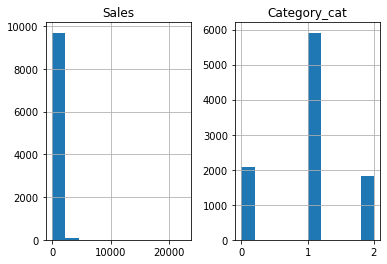

In [66]:
#Buat histogramnya
df2.hist()
plt.show()

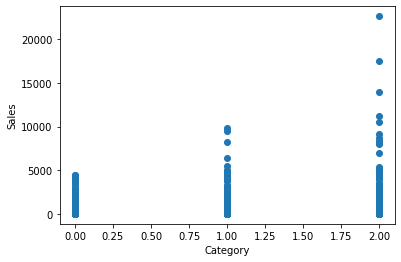

In [67]:
#Buat scatter plotnya
plt.scatter(df2["Category_cat"], df2["Sales"])
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

In [68]:
#Pembuatan dataset pelatihan dan pengujian
msk1 = np.random.rand(len(df)) < 0.8
train1 = df2[msk]
test1 = df2[~msk]

In [70]:
#Buat model regresi sederhananya
regr1 = linear_model.LinearRegression()
train_x1 = np.asanyarray(train1[['Category_cat']])
train_y1 = np.asanyarray(train1[['Sales']])
regr1.fit(train_x1, train_y1)
#The coefficients
print('Coefficients:', regr1.coef_)
print('Intercept:', regr1.intercept_)

Coefficients: [[38.01303441]]
Intercept: [197.39236592]


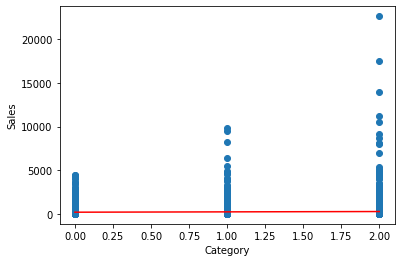

In [71]:
#Plot output model
plt.scatter(train1["Category_cat"], train1["Sales"])
plt.plot(train_x1, regr1.coef_[0][0]*train_x1 + regr1.intercept_[0], '-r')
plt.xlabel("Category")
plt.ylabel("Sales")
plt.show()

In [72]:
#Evaluasi
test_x1 = np.asanyarray(test1[["Category_cat"]])
test_y1 = np.asanyarray(test1[["Sales"]])
test_y_1 = regr1.predict(test_x1)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_1 - test_y1)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_1 - test_y1) ** 2))
print("R2-score: %.2f" % r2_score(test_y_1, test_y1))

Mean absolute error: 257.39
Residual sum of squares (MSE): 221483.26
R2-score: -380.68


Dapat dilihat pada visualisasi maupun pada hasil evaluasi bahwa korelasi antara kategori produk dengan total penjualan sangat minim, bahkan bisa dibilang tidak ada korelasinya. Mayoritas pesanan untuk setiap kategori memiliki nilai sales yang cenderung mirip.

**6. Analisis Perbedaan dalam Jumlah Penjualan Berdasarkan Mode Pengiriman yang Dipilih Pelanggan**

In [73]:
#Ubah tipe data kolom Ship Mode menjadi Category
df["Ship Mode"] = df["Ship Mode"].astype("category")

In [74]:
#Label Encoding untuk merubah value pada kolom Ship Mode menjadi dalam bentuk angka
df["Ship Mode Cat"] = df["Ship Mode"].cat.codes
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Order Date Name,Order Date Name Binary,Category_cat,Ship Mode Cat
0,1,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,Weekday,0,0,2
1,2,CA-2017-152156,2017-08-11,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,Weekday,0,0,2
2,3,CA-2017-138688,2017-12-06,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,Weekday,0,1,2
3,4,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,Weekday,0,0,3
4,5,US-2016-108966,2016-11-10,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,Weekday,0,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,...,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,Weekend,1,1,3
9796,9797,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,Weekday,0,1,3
9797,9798,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,Weekday,0,2,3
9798,9799,CA-2016-128608,2016-12-01,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,...,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,Weekday,0,2,3


In [75]:
#Potong dataset menjadi hanya kolom Sales dan Ship Mode Cat
df3 = df[["Sales", "Ship Mode Cat"]]
df3

,Sales,Ship Mode Cat
0,261.9600,2
1,731.9400,2
2,14.6200,2
3,957.5775,3
4,22.3680,3
...,...,...
9795,3.7980,3
9796,10.3680,3
9797,235.1880,3
9798,26.3760,3


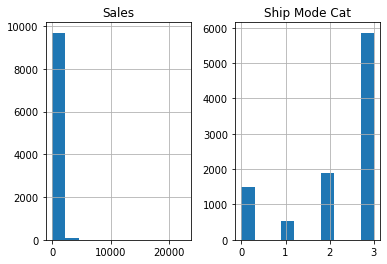

In [76]:
#Buat histogramnya
df3.hist()
plt.show()

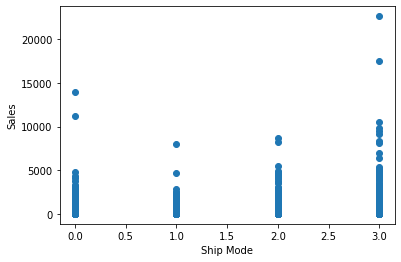

In [77]:
#Buat scatter plotnya
plt.scatter(df3["Ship Mode Cat"], df3["Sales"])
plt.xlabel("Ship Mode")
plt.ylabel("Sales")
plt.show()

In [78]:
#Pembuatan dataset pelatihan dan pengujian
msk2 = np.random.rand(len(df)) < 0.8
train2 = df3[msk]
test2 = df3[~msk]

In [79]:
#Buat model regresi sederhananya
regr2 = linear_model.LinearRegression()
train_x2 = np.asanyarray(train2[['Ship Mode Cat']])
train_y2 = np.asanyarray(train2[['Sales']])
regr2.fit(train_x2, train_y2)
#The coefficients
print('Coefficients:', regr2.coef_)
print('Intercept:', regr2.intercept_)

Coefficients: [[-3.58451092]]
Intercept: [242.48288108]


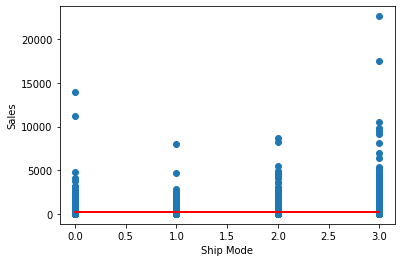

In [80]:
#Plot output model
plt.scatter(train2["Ship Mode Cat"], train2["Sales"])
plt.plot(train_x2, regr2.coef_[0][0]*train_x2 + regr2.intercept_[0], '-r')
plt.xlabel("Ship Mode")
plt.ylabel("Sales")
plt.show()

In [81]:
#Evaluasi
test_x2 = np.asanyarray(test2[["Ship Mode Cat"]])
test_y2 = np.asanyarray(test2[["Sales"]])
test_y_2 = regr2.predict(test_x2)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_2 - test_y2)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_2 - test_y2) ** 2))
print("R2-score: %.2f" % r2_score(test_y_2, test_y2))

Mean absolute error: 257.42
Residual sum of squares (MSE): 222642.07
R2-score: -14398.77


Dapat dilihat pada visualisasi maupun pada hasil evaluasi bahwa korelasi antara mode pengiriman dengan total penjualan sangat minim, bahkan bisa dibilang tidak ada korelasinya. Mayoritas pesanan di setiap mode pengiriman memiliki nilai sales yang cenderung mirip.